In [1]:
from axisvm.com.client import start_AxisVM
axvm = start_AxisVM(visible=True, daemon=True)

In [2]:
import numpy as np
from pyvista import examples
bunny = examples.download_bunny_coarse().cast_to_unstructured_grid()
coords = bunny.points
coords *= 100
topo = np.array(bunny.cells_dict[5], dtype=int)

In [3]:
from polymesh.tri.triutils import edges_tri
from polymesh.topo import unique_topo_data
edges, edgeIDs = unique_topo_data(edges_tri(topo))
edges += 1
edgeIDs += 1

In [4]:
modelId = axvm.Models.New()
axm = axvm.Models.Item[modelId]
axm.Settings.EditingTolerance = -1
wdir = ""

Add nodes

In [5]:
from axisvm.com.tlb import RPoint3d
foo = lambda x : RPoint3d(x=x[0], y=x[1], z=x[2])
axm.BeginUpdate()
axm.Nodes.BulkAdd(list(map(foo, coords)))
axm.EndUpdate()

0

Add edges

In [6]:
from axisvm.com.tlb import lgtStraightLine, RLineData

def gen_line(edge):
    return RLineData(
        NodeId1 = edge[0],
        NodeId2 = edge[1],
        GeomType = lgtStraightLine
    )
axm.BeginUpdate()
axm.Lines.BulkAdd(list(map(gen_line, edges)))
axm.EndUpdate()

0

In [7]:
from axisvm.com.tlb import vTop
axm.View = vTop
axm.FitInView();

In [8]:
from axisvm.com.tlb import ndcEuroCode
axm.Settings.NationalDesignCode = ndcEuroCode
matId = axm.Materials.AddFromCatalog(ndcEuroCode, "C16/20")

In [9]:
from axisvm.com.tlb import RSurfaceAttr, lnlTensionAndCompression, \
    RResistancesXYZ, schLinear, stShell, RElasticFoundationXYZ, \
    RNonLinearityXYZ, RSurface

SurfaceAttr = RSurfaceAttr(
    Thickness=0.1,
    SurfaceType=stShell,
    RefZId=0,
    RefXId=0,
    MaterialId=matId,
    ElasticFoundation=RElasticFoundationXYZ(0, 0, 0),
    NonLinearity=RNonLinearityXYZ(lnlTensionAndCompression,
                                  lnlTensionAndCompression,
                                  lnlTensionAndCompression),
    Resistance=RResistancesXYZ(0, 0, 0),
    Charactersitics=schLinear)

def gen_surface(edges):
    return RSurface(
        N=3,
        LineIndex1 = edges[0],
        LineIndex2 = edges[1],
        LineIndex3 = edges[2],
        Attr = SurfaceAttr,
        DomainIndex = 0
    )
axm.BeginUpdate()
axm.Surfaces.BulkAdd(list(map(gen_surface, edgeIDs)))
axm.EndUpdate()

0

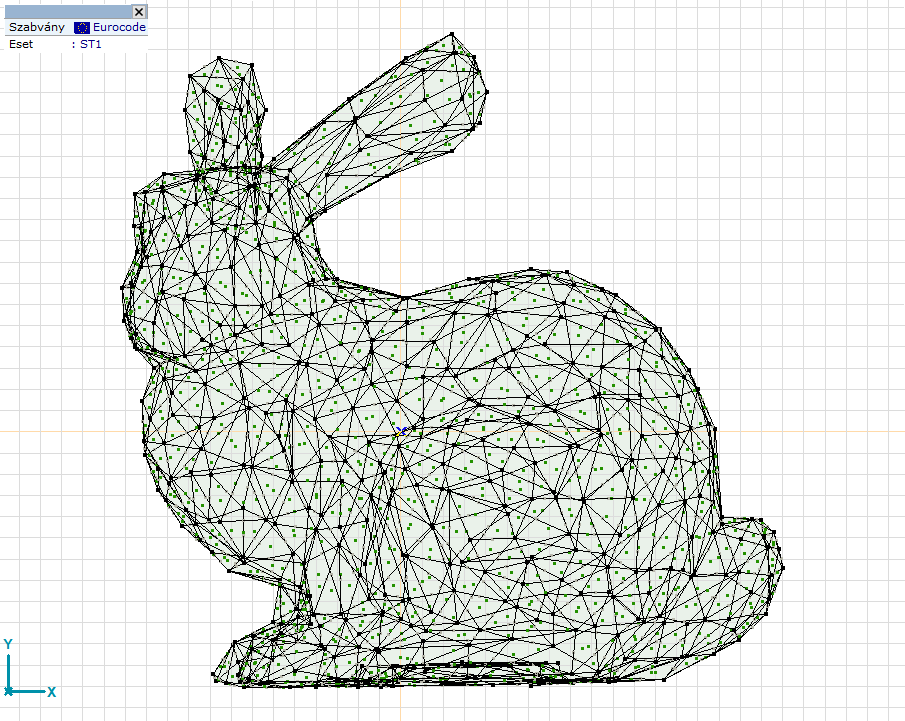

In [11]:
from axisvm.com.tlb import vTop, mftGeometry
axvm.BringToFront()
axm.View = vTop
axvm.MainFormTab = mftGeometry
axm.FitInView()
axm.Windows[1].screenshot()

In [ ]:
axvm.Quit()